In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

In [16]:
# Read the CSV data
df = pd.read_csv('D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\processed\\merged_file_preprocessed\\12_2024_merged_data.csv')

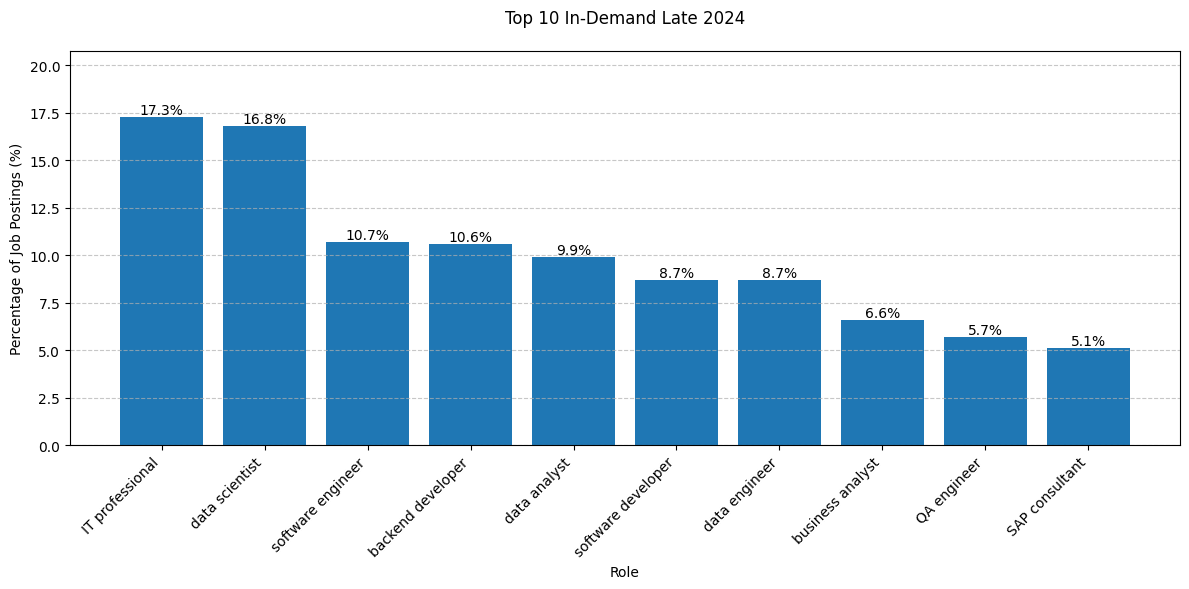


Detailed Percentage Breakdown:
IT professional: 17.3%
data scientist: 16.8%
software engineer: 10.7%
backend developer: 10.6%
data analyst: 9.9%
software developer: 8.7%
data engineer: 8.7%
business analyst: 6.6%
QA engineer: 5.7%
SAP consultant: 5.1%


In [17]:
# Count the frequency of each job title
job_counts = df['Role'].value_counts().head(10)

# Calculate percentages
total_jobs = job_counts.sum()
job_percentages = (job_counts / total_jobs * 100).round(1)

# Create a color palette
colors = plt.cm.Spectral(np.linspace(0, 1, len(job_percentages)))

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(job_percentages.index, job_percentages.values)
plt.title('Top 10 In-Demand Late 2024', pad=20)
plt.xlabel('Role')
plt.ylabel('Percentage of Job Postings (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}%',
             ha='center', va='bottom')

# Add a horizontal grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis to show percentages from 0 to 100
plt.ylim(0, max(job_percentages.values) * 1.2)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print detailed breakdown
print("\nDetailed Percentage Breakdown:")
for role, percentage in job_percentages.items():
    print(f"{role}: {percentage}%")

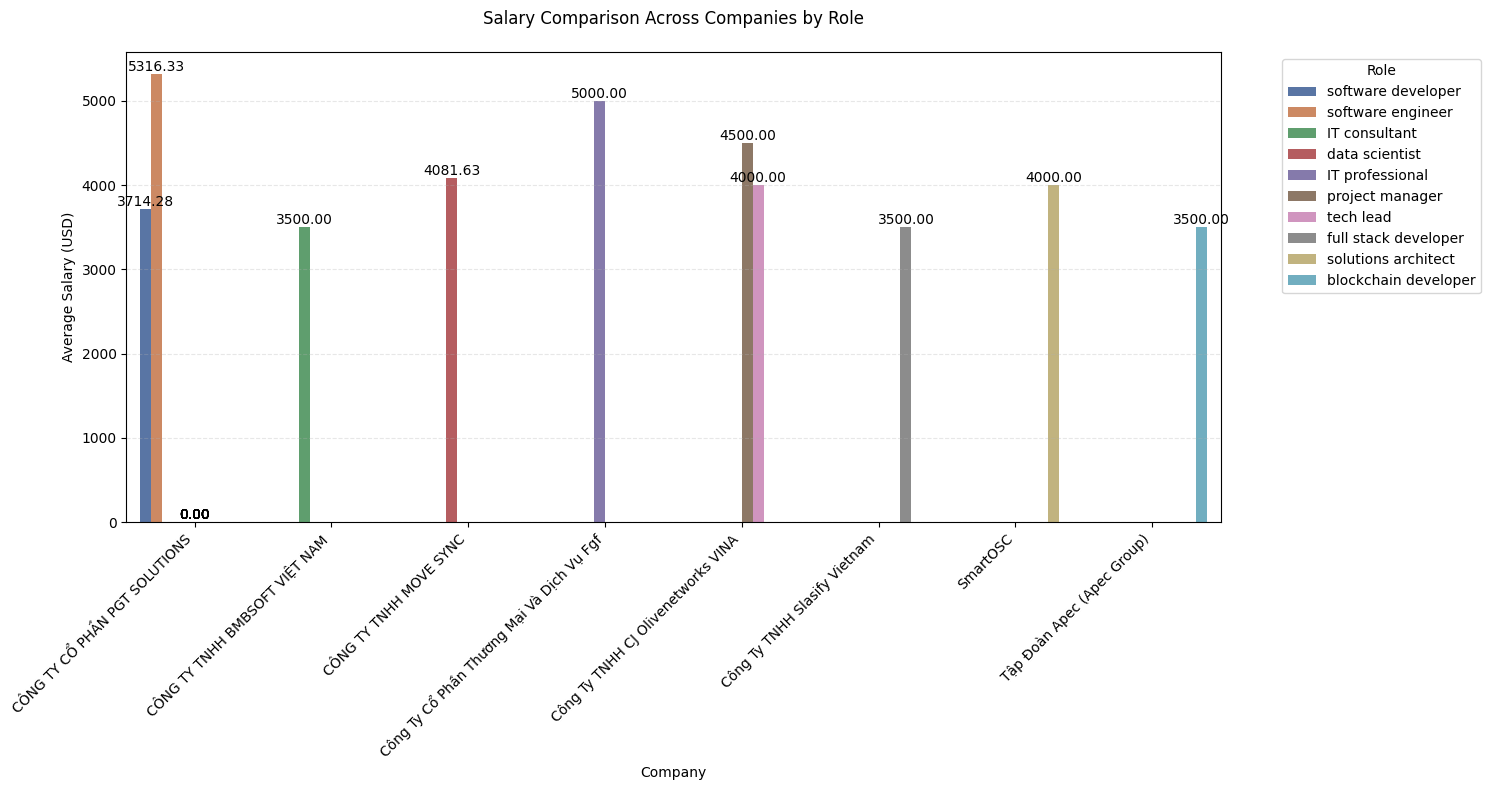


Detailed Salary Analysis by Company and Role:
                                           Average Salary  Min Salary  \
Company                                                                 
Công Ty Cổ Phần Thương Mại Và Dịch Vụ Fgf         5000.00     5000.00   
CÔNG TY CỔ PHẦN PGT SOLUTIONS                     4995.92     3714.28   
Công Ty TNHH CJ Olivenetworks VINA                4250.00     4000.00   
CÔNG TY TNHH MOVE SYNC                            4081.63     4081.63   
SmartOSC                                          4000.00     4000.00   
CÔNG TY TNHH BMBSOFT VIỆT NAM                     3500.00     3500.00   
Công Ty TNHH Slasify Vietnam                      3500.00     3500.00   
Tập Đoàn Apec (Apec Group)                        3500.00     3500.00   
RGF HR Agent Vietnam Co., LTD                     3469.38     3469.38   
CÔNG TY TNHH QUICK VIỆT NAM                       3000.00     3000.00   

                                           Max Salary  Number of Positions  

In [18]:
# Function to convert salary ranges to numeric values
def extract_salary(salary_str):
    if pd.isna(salary_str) or salary_str == 'Thương lượng':
        return np.nan
    try:
        salary_str = salary_str.replace('$', '').replace(',', '')
        numbers = [float(s) for s in salary_str.split('-') if s.strip().replace('.', '').isdigit()]
        return np.mean(numbers) if numbers else np.nan
    except:
        return np.nan

# Process salary data
df['Avg_Salary'] = df['Salary Range'].apply(extract_salary)

# Filter out rows with no salary information and 'N/A' companies
df_filtered = df[df['Avg_Salary'].notna() & (df['Company'] != 'N/A')]

# Group by company and role to get average salaries
salary_comparison = df_filtered.groupby(['Company', 'Role'])['Avg_Salary'].mean().reset_index()

# Get top companies by average salary
top_companies = df_filtered.groupby('Company')['Avg_Salary'].mean().nlargest(8).index

# Filter data for top companies
plot_data = salary_comparison[salary_comparison['Company'].isin(top_companies)]

# Create the visualization
plt.figure(figsize=(15, 8))

# Create a grouped bar plot
ax = sns.barplot(data=plot_data,
                 x='Company',
                 y='Avg_Salary',
                 hue='Role',
                 palette='deep')

plt.title('Salary Comparison Across Companies by Role', pad=20)
plt.xlabel('Company')
plt.ylabel('Average Salary (USD)')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust legend
plt.legend(title='Role', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Display the average salary values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print detailed analysis
print("\nDetailed Salary Analysis by Company and Role:")
summary = df_filtered.groupby('Company').agg({
    'Avg_Salary': ['mean', 'min', 'max', 'count']
}).round(2)

summary.columns = ['Average Salary', 'Min Salary', 'Max Salary', 'Number of Positions']
print(summary.sort_values(('Average Salary'), ascending=False).head(10))

# Calculate salary premium by role
role_salary_premium = df_filtered.groupby('Role').agg({
    'Avg_Salary': ['mean', 'std', 'count']
}).round(2)

print("\nSalary Premium by Role:")
print(role_salary_premium.sort_values(('Avg_Salary', 'mean'), ascending=False).head(10))

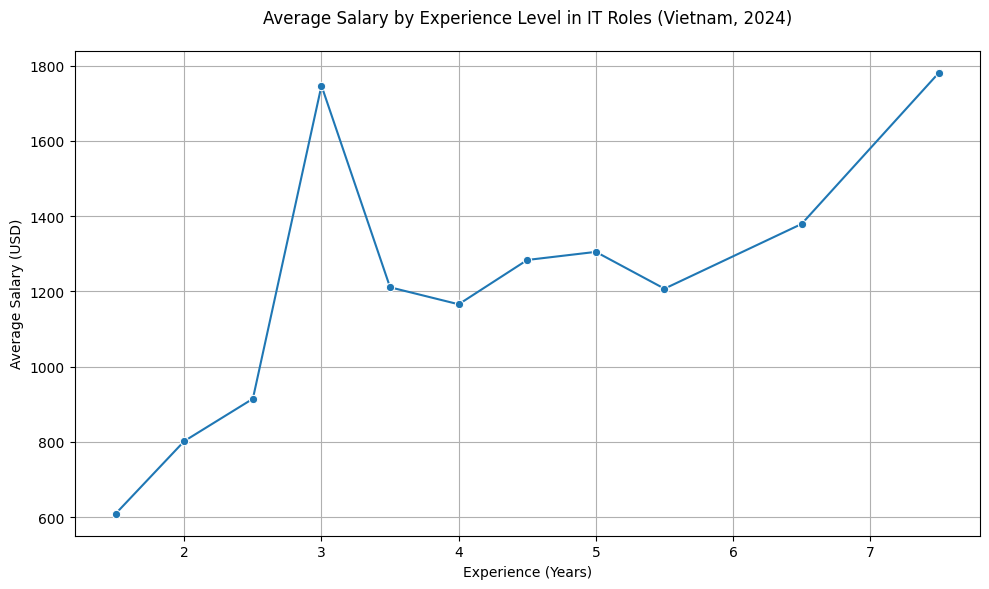


Detailed Salary Statistics by Experience Level:
                     Average Salary  Min Salary  Max Salary  \
Years of Experience                                           
10.5                        2142.86     2142.86     2142.86   
12.5                        2000.00     2000.00     2000.00   
7.5                         1780.72     1100.00     2500.00   
3.0                         1746.65      500.00     6122.45   
7.0                         1588.44     1122.45     2142.86   
10.0                        1530.61     1530.61     1530.61   
8.0                         1479.59      959.18     2000.00   
6.0                         1454.08     1122.45     2448.98   
9.0                         1450.00     1150.00     1750.00   
6.5                         1379.04      612.24     2150.00   
5.0                         1304.76      632.65     2244.90   
4.5                         1283.27      918.36     2448.98   
3.5                         1210.63      510.20     5408.16   
5.5   

In [5]:
# Function to convert salary ranges to numeric values
def extract_salary(salary_str):
    if pd.isna(salary_str) or salary_str == 'Thương lượng':
        return np.nan
    try:
        salary_str = salary_str.replace('$', '').replace(',', '')
        numbers = [float(s) for s in salary_str.split('-') if s.strip().replace('.', '').isdigit()]
        return np.mean(numbers) if numbers else np.nan
    except:
        return np.nan

def extract_experience(experience_str):
    if pd.isna(experience_str):
        return np.nan
    try:
        experience_str = experience_str.lower()
        
        # Handling experience ranges like '3-5'
        if '-' in experience_str:
            numbers = [float(s) for s in experience_str.split('-') if s.strip().replace('.', '').isdigit()]
            return np.mean(numbers) if numbers else np.nan
        
        # Handling specific experience levels
        if 'junior' in experience_str:
            return 1
        elif 'mid' in experience_str or '2+ years' in experience_str:
            return 3
        elif 'senior' in experience_str or '5+ years' in experience_str:
            return 5
        elif 'lead' in experience_str or 'manager' in experience_str:
            return 7
        elif 'director' in experience_str:
            return 10
        else:
            return np.nan
    except:
        return np.nan

# Apply the function to create a new 'Experience' column
df['Years of Experience'] = df['Years of Experience'].apply(extract_experience)

# Process salary data
df['Avg_Salary'] = df['Salary Range'].apply(extract_salary)

# Remove rows with NaN experience or salary
df_cleaned = df.dropna(subset=['Years of Experience', 'Avg_Salary'])

# Calculate average salary by experience level
experience_salary = df_cleaned.groupby('Years of Experience')['Avg_Salary'].agg(['mean', 'count']).reset_index()

# Remove rows with low counts (if count <= 5)
experience_salary = experience_salary[experience_salary['count'] > 5]

# Create the visualization for experience vs salary
plt.figure(figsize=(10, 6))

# Create a line plot or scatter plot
sns.lineplot(x=experience_salary['Years of Experience'], y=experience_salary['mean'], marker='o')

# Customize the plot
plt.title('Average Salary by Experience Level in IT Roles (Vietnam, 2024)', pad=20)
plt.xlabel('Experience (Years)')
plt.ylabel('Average Salary (USD)')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print detailed statistics for experience level correlation
experience_stats = df_cleaned.groupby('Years of Experience').agg({
    'Avg_Salary': ['mean', 'min', 'max', 'count']
}).round(2)
experience_stats.columns = ['Average Salary', 'Min Salary', 'Max Salary', 'Number of Positions']
print("\nDetailed Salary Statistics by Experience Level:")
print(experience_stats.sort_values('Average Salary', ascending=False))


C:\Users\nmtho\AppData\Local\Temp\ipykernel_18312\490899897.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y=top_10_skills.index, data=top_10_skills, palette="viridis")


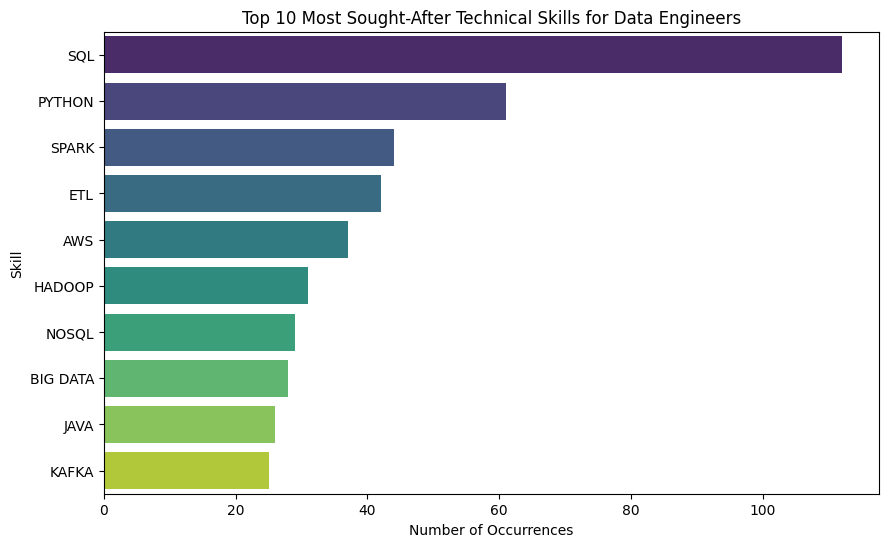

In [13]:
# Filter for Data Engineer roles
data_engineer_jobs = df[df['Role'] == 'data engineer']  # Assuming 'Data Scientist' is used for Data Engineer roles

# Standardize skill names to lowercase for counting
all_skills = data_engineer_jobs['Required Skills'].str.split(',').explode().str.strip().str.lower()

# Count occurrences of each skill
skill_counts = Counter(all_skills)

# Create a DataFrame to store skills and their counts
skill_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['Count'])

# Convert the skill names to uppercase after counting
skill_df.index = skill_df.index.str.upper()

# Sort skills by count in descending order
skill_df = skill_df.sort_values('Count', ascending=False)

# Visualize top 10 skills
top_10_skills = skill_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y=top_10_skills.index, data=top_10_skills, palette="viridis")
plt.xlabel('Number of Occurrences')
plt.ylabel('Skill')
plt.title('Top 10 Most Sought-After Technical Skills for Data Engineers')
plt.show()

In [ ]:
import pandas as pd
import pandas as pd
from tabulate import tabulate


df = pd.read_csv('D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\processed\\merged_file_preprocessed\\12_2024_merged_data.csv')

# Clean the Salary Range column
def parse_salary_range(salary):
    if isinstance(salary, str) and '-' in salary:
        low, high = salary.replace('$', '').split('-')
        return (float(low.strip()) + float(high.strip())) / 2  # Calculate the midpoint of the range
    elif isinstance(salary, str) and salary.startswith('$'):
        return float(salary.replace('$', '').strip())  # Single value salary
    return np.nan  # Treat "Negotiable" or missing as NaN

df['Salary Range'] = df['Salary Range'].apply(parse_salary_range)

# Ensure Years of Experience is numeric
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')

# Drop rows with NaN in relevant columns
df = df.dropna(subset=['Salary Range', 'Years of Experience'])

# Group by Role and Years of Experience to calculate salary statistics
salary_stats = df.groupby(['Role', 'Years of Experience'])['Salary Range'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()

# Rename columns for clarity
salary_stats.rename(columns={
    'mean': 'Average Salary',
    'median': 'Median Salary',
    'min': 'Minimum Salary',
    'max': 'Maximum Salary',
    'count': 'Job Count'
}, inplace=True)

# Sort for better readability
salary_stats = salary_stats.sort_values(by=['Role', 'Years of Experience'])

# Display the statistics
# print(salary_stats)

# Save the salary statistics to a CSV file
output_path = "D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\processed\\merged_file_preprocessed\\salary_statistics.csv"
salary_stats.to_csv(output_path, index=False)


import pandas as pd
from tabulate import tabulate

# File path
file_path = r"D:\Work\Projects\Intro2DS-ITJobTrendAnalysis\data\processed\merged_file_preprocessed\salary_statistics.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Define experience ranges
def experience_range(years):
    if years <= 1:
        return "1 Year"
    elif 1 < years <= 2:
        return "1-2 Years"
    elif 3 <= years <= 4:
        return "3-4 Years"
    else:
        return "5+ Years"

# Add a column for experience range
df["Experience Range"] = df["Years of Experience"].apply(experience_range)

# Group by Role and Experience Range, calculate average and median salary
grouped = df.groupby(["Role", "Experience Range"]).agg({
    "Average Salary": "mean",
    "Median Salary": "mean"
}).reset_index()

# Pivot the table for better readability
pivot_table = grouped.pivot(index="Role", columns="Experience Range", values=["Average Salary", "Median Salary"])

# Replace NaN with "-" for missing data
pivot_table = pivot_table.fillna("-")

# Print the table
print(tabulate(pivot_table, headers="keys", tablefmt="pretty"))

+-----------------+------------------------------+---------------------------------+---------------------------------+--------------------------------+-----------------------------+--------------------------------+--------------------------------+-------------------------------+
|      Role       | ('Average Salary', '1 Year') | ('Average Salary', '1-2 Years') | ('Average Salary', '3-4 Years') | ('Average Salary', '5+ Years') | ('Median Salary', '1 Year') | ('Median Salary', '1-2 Years') | ('Median Salary', '3-4 Years') | ('Median Salary', '5+ Years') |
+-----------------+------------------------------+---------------------------------+---------------------------------+--------------------------------+-----------------------------+--------------------------------+--------------------------------+-------------------------------+
| DevOps engineer |              -               |             1463.27             |                -                |             3750.0             |         